In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Data Summary
print(df.info())  # Display basic information about the dataset
print(df.describe())  # Summary statistics for numeric columns

# Data Cleaning
# Check for missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

several features stand out as potentially important for predicting house prices. These include the "sqft_living" , "grade" (grading of the overall construction and design), "sqft_above" (square footage of the house apart from the basement), "bathrooms," and "bedrooms.". These features are likely to have a substantial impact on house prices as they directly relate to the size, quality, and amenities of the houses, making them essential candidates for feature selection in building predictive models for house prices.

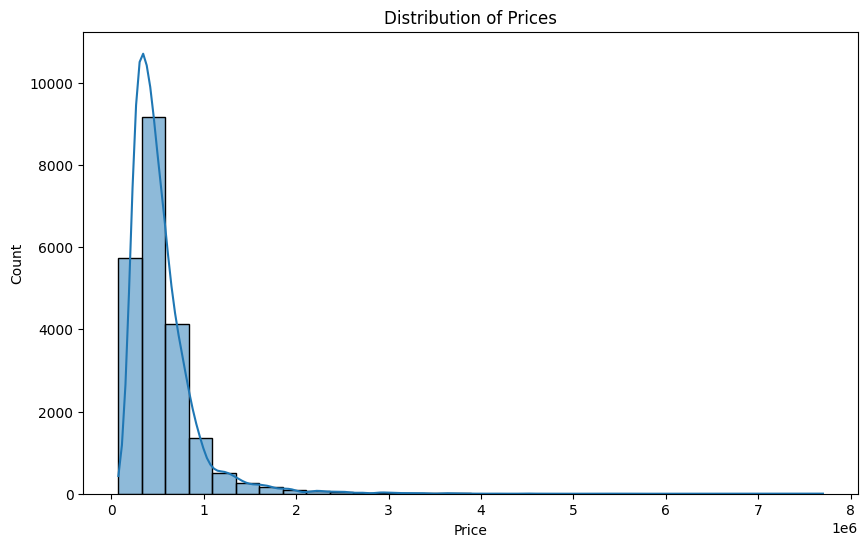

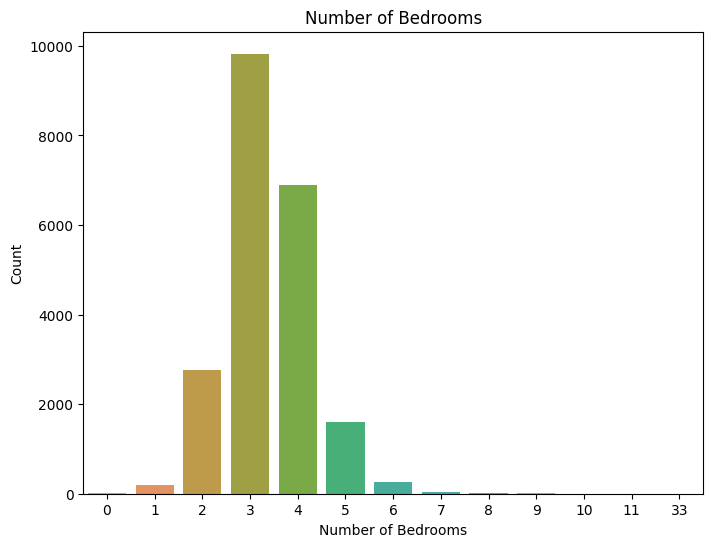

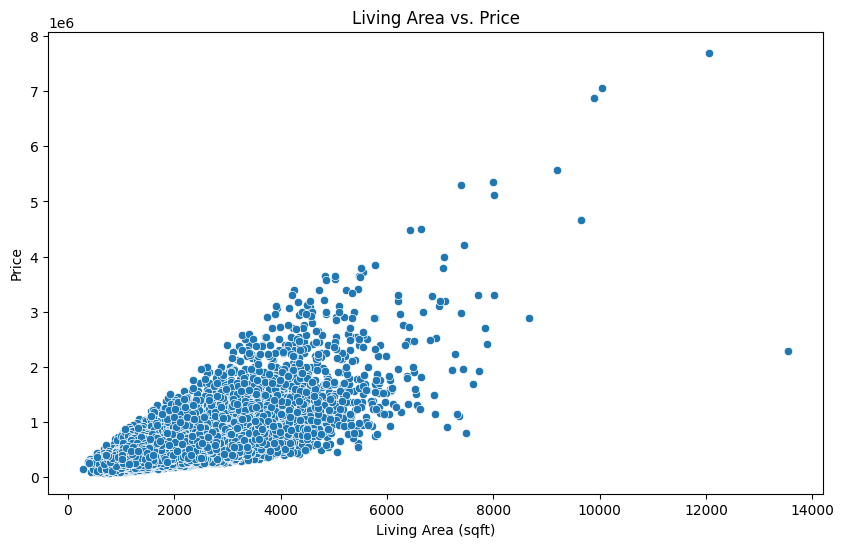

In [5]:
# Data Visualization
# 1. Histogram of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# 2. Number of Bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bedrooms')
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

# 3. Scatterplot of Living Area vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Living Area vs. Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17290, 20)
X_test shape: (4323, 20)
y_train shape: (17290,)
y_test shape: (4323,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop the 'date' column as it is non-numeric
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)


Training RMSE: 198235.8749524164
Testing RMSE: 212520.1585283099
R-squared (Training): 0.6992125596323571
R-squared (Testing): 0.7012448735876677


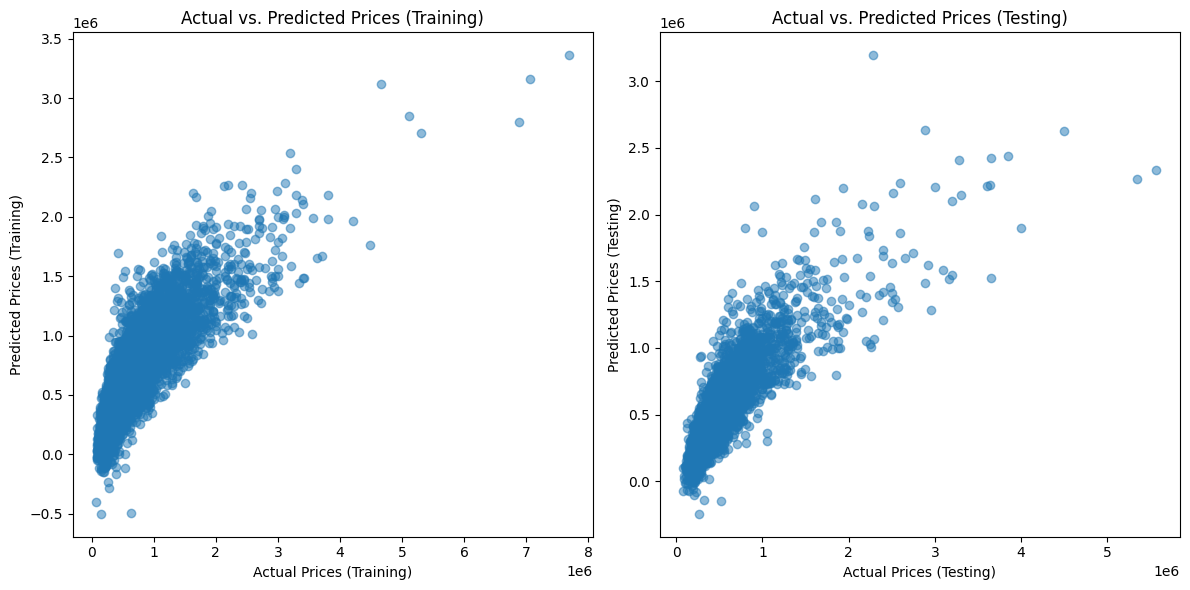

In [8]:
import matplotlib.pyplot as plt

# Create scatterplots for the training and testing datasets
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.xlabel("Actual Prices (Training)")
plt.ylabel("Predicted Prices (Training)")
plt.title("Actual vs. Predicted Prices (Training)")

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("Actual Prices (Testing)")
plt.ylabel("Predicted Prices (Testing)")
plt.title("Actual vs. Predicted Prices (Testing)")

plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Calculate R-squared (R2)
r2 = r2_score(y_test, test_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 45164817780.89797
Root Mean Squared Error (RMSE): 212520.1585283099
R-squared (R2): 0.7012448735876677


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a multi-linear regression model
multi_linear_model = LinearRegression()

# Fit the multi-linear model to the training data
multi_linear_model.fit(X_train, y_train)

# Make predictions on the training set
multi_train_predictions = multi_linear_model.predict(X_train)

# Make predictions on the testing set
multi_test_predictions = multi_linear_model.predict(X_test)

# Evaluate the multi-linear model
multi_train_rmse = mean_squared_error(y_train, multi_train_predictions, squared=False)
multi_test_rmse = mean_squared_error(y_test, multi_test_predictions, squared=False)
multi_r2_train = r2_score(y_train, multi_train_predictions)
multi_r2_test = r2_score(y_test, multi_test_predictions)

print("Multi-linear Regression Training RMSE:", multi_train_rmse)
print("Multi-linear Regression Testing RMSE:", multi_test_rmse)
print("Multi-linear Regression R-squared (Training):", multi_r2_train)
print("Multi-linear Regression R-squared (Testing):", multi_r2_test)

# Compare linear and multi-linear models
print("\nComparison between Linear and Multi-linear Models:")
print("Linear Regression Testing RMSE:", test_rmse)
print("Multi-linear Regression Testing RMSE:", multi_test_rmse)
print("Linear Regression R-squared (Testing):", r2_test)
print("Multi-linear Regression R-squared (Testing):", multi_r2_test)


Multi-linear Regression Training RMSE: 198235.8749524164
Multi-linear Regression Testing RMSE: 212520.1585283099
Multi-linear Regression R-squared (Training): 0.6992125596323571
Multi-linear Regression R-squared (Testing): 0.7012448735876677

Comparison between Linear and Multi-linear Models:
Linear Regression Testing RMSE: 212520.1585283099
Multi-linear Regression Testing RMSE: 212520.1585283099
Linear Regression R-squared (Testing): 0.7012448735876677
Multi-linear Regression R-squared (Testing): 0.7012448735876677


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can adjust the degree of the polynomial
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial regression model to the training data
polyreg_model.fit(X_train, y_train)

# Make predictions on the training set
polyreg_train_predictions = polyreg_model.predict(X_train)

# Make predictions on the testing set
polyreg_test_predictions = polyreg_model.predict(X_test)

# Evaluate the polynomial regression model
polyreg_train_rmse = mean_squared_error(y_train, polyreg_train_predictions, squared=False)
polyreg_test_rmse = mean_squared_error(y_test, polyreg_test_predictions, squared=False)
polyreg_r2_train = r2_score(y_train, polyreg_train_predictions)
polyreg_r2_test = r2_score(y_test, polyreg_test_predictions)

print("Polynomial Regression (Degree", degree, ") Training RMSE:", polyreg_train_rmse)
print("Polynomial Regression (Degree", degree, ") Testing RMSE:", polyreg_test_rmse)
print("Polynomial Regression (Degree", degree, ") R-squared (Training):", polyreg_r2_train)
print("Polynomial Regression (Degree", degree, ") R-squared (Testing):", polyreg_r2_test)

# Compare linear, multi-linear, and polynomial regression models
print("\nComparison between Linear, Multi-linear, and Polynomial Regression Models:")
print("Linear Regression Testing RMSE:", test_rmse)
print("Multi-linear Regression Testing RMSE:", multi_test_rmse)
print("Polynomial Regression (Degree", degree, ") Testing RMSE:", polyreg_test_rmse)
print("Linear Regression R-squared (Testing):", r2_test)
print("Multi-linear Regression R-squared (Testing):", multi_r2_test)
print("Polynomial Regression (Degree", degree, ") R-squared (Testing):", polyreg_r2_test)


Polynomial Regression (Degree 2 ) Training RMSE: 183127.75084812
Polynomial Regression (Degree 2 ) Testing RMSE: 227058.3752312698
Polynomial Regression (Degree 2 ) R-squared (Training): 0.743313211158446
Polynomial Regression (Degree 2 ) R-squared (Testing): 0.6589719078222259

Comparison between Linear, Multi-linear, and Polynomial Regression Models:
Linear Regression Testing RMSE: 212520.1585283099
Multi-linear Regression Testing RMSE: 212520.1585283099
Polynomial Regression (Degree 2 ) Testing RMSE: 227058.3752312698
Linear Regression R-squared (Testing): 0.7012448735876677
Multi-linear Regression R-squared (Testing): 0.7012448735876677
Polynomial Regression (Degree 2 ) R-squared (Testing): 0.6589719078222259


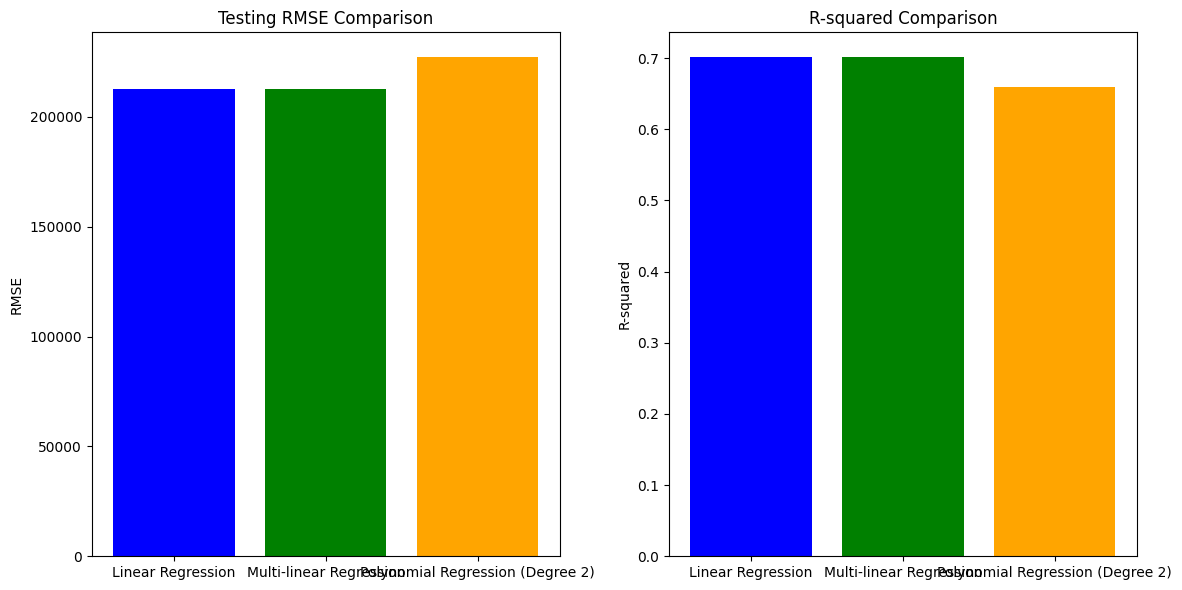

In [12]:
import matplotlib.pyplot as plt

# Replace these placeholders with your actual RMSE values
rmse_values = [test_rmse, multi_test_rmse, polyreg_test_rmse]

# Replace these placeholders with your actual R-squared values
r2_values = [r2_test, multi_r2_test, polyreg_r2_test]

model_names = ["Linear Regression", "Multi-linear Regression", "Polynomial Regression (Degree 2)"]

# Create subplots
plt.figure(figsize=(12, 6))

# Subplot 1: RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_values, color=['blue', 'green', 'orange'])
plt.title('Testing RMSE Comparison')
plt.ylabel('RMSE')

# Subplot 2: R-squared comparison
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=['blue', 'green', 'orange'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()
